![Alt text](image.png)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from statsmodels.regression.linear_model import OLS, WLS
from statsmodels.tools.tools import  add_constant

In [3]:
doc2000 = pd.read_excel("/Users/margogusarova/VScode/Static/Static_lab_1/Lab_4/LAB_4_DATA_2023.xlsx")
doc2000.head()

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час),Unnamed: 4,Unnamed: 5,ЧАСТЬ 1
0,22.384615,12,0,53.410000,NaN,NaN,В таблице содержатся данные о 540 работниках
1,8.903846,12,0,8.000000,NaN,NaN,1. Найдите оценки параметров линейной регресси...
2,13.250000,15,0,24.000000,NaN,NaN,"1.1. Проверьте, обладает ли модель высокой объ..."
3,18.250000,13,0,29.500000,NaN,NaN,2. Найдите оценки параметров линейной регресси...
4,13.769231,18,0,32.049999,NaN,NaN,"2.1. Как в среднем изменится ЗАРПЛАТА, если СТ..."


1. Найдите оценки параметров линейной регрессивной модели зависимости ЗАРПЛАТЫ от Z - Время затраченное на образование (лет)

In [4]:
alfa=0.04
Y = doc2000['Зарплата (долл. в час)']
X = doc2000['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)']


X=np.array(X)

x= X.reshape(len(X),1)
model = LinearRegression()
model.fit(x, Y)
print('coefficient of determination:', model.score(x, Y))
print('intercept:', model.intercept_) # b₀
print('slope:', model.coef_) # b₁


#проверка на нормальность остатков регрессии
Y_predicted = model.predict(x)
errors=Y-Y_predicted

from scipy import stats


# Тест Шапиро-Уилка
shapiro_test_statistic, shapiro_p_value = stats.shapiro(errors)
print("Shapiro-Wilk Test:")
if (shapiro_p_value > alfa):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")

print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

# Тест Д'Агостино-Пирсона
dagostino_test_statistic, dagostino_p_value = stats.normaltest(errors)
print("\nD'Agostino-Pearson Test:")
if (dagostino_p_value > alfa):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")
print("Test Statistic:", dagostino_test_statistic)
print("p-value:", dagostino_p_value)



coefficient of determination: 0.17249816081531233
intercept: -13.933465548912245
slope: [2.45532052]
Shapiro-Wilk Test:
Ошибки регрессии имеют НЕ нормальное распределение
Test Statistic: 0.7628456950187683
p-value: 3.650963439973517e-27

D'Agostino-Pearson Test:
Ошибки регрессии имеют НЕ нормальное распределение
Test Statistic: 393.26004215435154
p-value: 4.0240824426038e-86


1.1. Проверьте, обладает ли модель высокой объясняющей способностью, или же модель низкого качества

In [5]:
#t-тест
from scipy import stats

# Параметры регрессии
n = len(Y)  # Количество наблюдений
k = 1  # Количество объясняющих переменных (модель имеет только одну)

# R-квадрат из вашей модели
r_squared = model.score(x, Y)

# Вычисление статистики для t-теста
t_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

# Рассчитываем p-значение для t-теста
p_value = 1 - stats.f.cdf(t_statistic, k, n - k - 1)

# Определение уровня значимости 
alpha = 0.04

# Вывод результатов
print("R-squared:", r_squared)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Модель обладает статистически значимой объясняющей способностью (высокой качеством).")
else:
    print("Модель не обладает статистически значимой объясняющей способностью (низкой качеством).")


R-squared: 0.17249816081531233
t-statistic: 112.14961239249328
p-value: 1.1102230246251565e-16
Модель обладает статистически значимой объясняющей способностью (высокой качеством).


In [6]:
#F-тест
print("H0: построенная модель низкого качества")
print("H1: построенная модель обладает высокой объясняющей способностью")
k1=1
k2=len(Y)-2

RSS = sum((Y_predicted - Y.mean())**2)
ESS = sum(errors**2)

F=RSS*(len(Y)-2)/ESS
f_critical = stats.f.ppf(1 - alpha, k1, k2)
if(F > f_critical):
  print("Гипотеза H0 отвергается => построенная модель обладает высокой объясняющей способностью")
else:
  print("Гипотеза H0 принимается => построенная модель низкого качества")

H0: построенная модель низкого качества
H1: построенная модель обладает высокой объясняющей способностью
Гипотеза H0 отвергается => построенная модель обладает высокой объясняющей способностью


2. Найдите оценки параметров линейной регрессивной модели зависимости ЗАРПЛАТЫ от СТАЖА РАБОТЫ, ВРЕМЕНИ, ЗАТРАЧЕННОГО НА ОБРАЗОВАНИЕ, и ПОЛА РАБОТНИКА

In [10]:
import statsmodels.api as sm

# Ваши данные
X = doc2000[['СТАЖ РАБОТЫ (лет)', 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)', 'ПОЛ (1-жен, 0- муж)']]
Y = doc2000['Зарплата (долл. в час)']

# Добавляем константу (b₀) в модель
X = sm.add_constant(X)

# Оценка параметров модели
model = sm.OLS(Y, X).fit()

result_2 = model.summary()
# Вывод результатов
print(model.summary())




                              OLS Regression Results                              
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.241
Model:                                OLS   Adj. R-squared:                  0.237
Method:                     Least Squares   F-statistic:                     56.68
Date:                    Sat, 16 Dec 2023   Prob (F-statistic):           7.74e-32
Time:                            13:13:45   Log-Likelihood:                -2132.2
No. Observations:                     540   AIC:                             4272.
Df Residuals:                         536   BIC:                             4290.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

2.1. Как в среднем изменится ЗАРПЛАТА, если СТАЖ РАБОТЫ увеличится на 2 года?													

In [11]:
b1 = model.params['СТАЖ РАБОТЫ (лет)']  

# Увеличение стажа на 2 года
increase_in_experience = 2

# Ожидаемое изменение зарплаты при увеличении стажа на 2 года
expected_salary_change = b1 * increase_in_experience

print("Ожидаемое изменение зарплаты при увеличении стажа на 2 года:", expected_salary_change)

#Если b₁ положительно, это означает, что с увеличением стажа работы зарплата в среднем увеличивается.

Ожидаемое изменение зарплаты при увеличении стажа на 2 года: 0.8113543980273513


2.2. Какую в среднем прибавку к ЗАРПЛАТЕ  дает дополнительный год обучения?

In [12]:
b2 = model.params['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)']  
# Прибавка к зарплате за дополнительный год обучения
additional_education_year_effect = b2 

print("Прибавка к зарплате за дополнительный год обучения:", additional_education_year_effect)

#сли оцененный параметр для времени, затраченного на образование (b₂) равен 0, это означает, что в вашей модели образование не имеет статистически значимого влияния на зарплату. Следовательно, дополнительный год обучения в данной модели не прибавляет и не уменьшает в среднем зарплату.
#В этом случае, если b₂ не статистически значимо отличается от нуля, то можно сказать, что в данной модели образование не оказывает статистически значимого влияния на зарплату работников.

Прибавка к зарплате за дополнительный год обучения: 2.591137323674422


In [15]:
X = doc2000[['СТАЖ РАБОТЫ (лет)', 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)', 'ПОЛ (1-жен, 0- муж)']]
Y = doc2000['Зарплата (долл. в час)']

# Добавляем константу (b₀) в модель
X = sm.add_constant(X)

# Оценка параметров модели
model = sm.OLS(Y, X).fit()

# Получение предсказанных значений
Y_predicted = model.predict(X)

# Вычисление вектора остатков
e = Y - Y_predicted

In [16]:
# Тест Шапиро-Уилка
shapiro_test_statistic, shapiro_p_value = stats.shapiro(e)
print("Shapiro-Wilk Test:")
if (shapiro_p_value > alfa):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")

print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

# Тест Д'Агостино-Пирсона
dagostino_test_statistic, dagostino_p_value = stats.normaltest(e)
print("\nD'Agostino-Pearson Test:")
if (dagostino_p_value > alfa):
  print("Ошибки регрессии имеют нормальное распределение")
else:
  print("Ошибки регрессии имеют НЕ нормальное распределение")
print("Test Statistic:", dagostino_test_statistic)
print("p-value:", dagostino_p_value)

Shapiro-Wilk Test:
Ошибки регрессии имеют НЕ нормальное распределение
Test Statistic: 0.7591450214385986
p-value: 2.435342073944554e-27

D'Agostino-Pearson Test:
Ошибки регрессии имеют НЕ нормальное распределение
Test Statistic: 404.75225464943424
p-value: 1.2857739834290298e-88


2.3 Проверьте, обладает ли модель из п.3. высокой объясняющей способностью, или же модель низкого качества

In [18]:
#t-тест
print(f"H0: bi=0 => незначим ")
print(f'H1: bi не равен 0 => значим')
print()

bi= model.params
bi=np.array(bi)


Z=X.transpose().dot(X)
invZ=np.linalg.matrix_power(Z, -1)
s_e_2=(1/(len(Y)-4))*sum(e**2)
s_e=np.sqrt(s_e_2)

t_crit= stats.t.ppf(1 - alpha / 2, len(Y))

cob0=s_e*np.sqrt(invZ[0, 0])
t=bi[0]/cob0
if(abs(t)>t_crit):
    print(f" b{0} значим")
else:
    print(f" b{0}  НЕ значим")

for i in range(len(bi)-1):
  cobi=s_e*np.sqrt(invZ[i+1, i+1])
  t=bi[i+1]/cobi
  if(abs(t)>t_crit):
      print(f" b{i+1} значим")
  else:
      print(f" b{i+1}  НЕ значим")

print(invZ)

H0: bi=0 => незначим 
H1: bi не равен 0 => значим

 b0 значим
 b1 значим
 b2 значим
 b3 значим
[[ 1.19867916e-01 -2.45008050e-03 -5.27439010e-03 -8.99239602e-03]
 [-2.45008050e-03  1.04603019e-04  4.23119835e-05  2.07506753e-04]
 [-5.27439010e-03  4.23119835e-05  3.29260807e-04  1.15151163e-04]
 [-8.99239602e-03  2.07506753e-04  1.15151163e-04  7.82217140e-03]]


In [19]:
#F-тест
print("H0: построенная модель низкого качества")
print("H1: построенная модель обладает высокой объясняющей способностью")
#k1=4
#k2=536
m=4
k1=m
k2=len(Y)-m-1

RSS = sum((Y_predicted - Y.mean())**2)
ESS = sum(e**2)

F=RSS*(len(Y)-m-1)/(ESS*m)
F_critic =stats.f.ppf(1 - alpha, k1, k2)
if(F > F_critic):
  print("Гипотеза H0 отвергается => построенная модель обладает высокой объясняющей способностью")
else:
  print("Гипотеза H0 принимается => построенная модель низкого качества")

H0: построенная модель низкого качества
H1: построенная модель обладает высокой объясняющей способностью
Гипотеза H0 отвергается => построенная модель обладает высокой объясняющей способностью


2.4. Значимо ли отличаются зарплаты мужчины и женщины при прочих равных условиях (т. е. стаже и числу лет, затраченных на образование)?

In [20]:
print("H0: b3=0")
print("H1: b3 не равно 0 , следовательно значимо")
Z=X.transpose().dot(X) # Вычисление ковариационной матрицы
invZ=np.linalg.matrix_power(Z, -1)
s_e_2=(1/(len(Y)-4))*sum(e**2) # Вычисление стандартных ошибок коэффициентов

cob3=np.sqrt(s_e_2)*np.sqrt(invZ[3,3])

t=bi[3]/cob3 # отношение оценки коэффициента к соответствующей стандартной ошибке.
t_crit= stats.t.ppf(1 - alpha / 2, len(Y)-4-1)
if (abs(t)>t_crit):
  print("Принимаем H1")
else:
  print("Принимаем H0")

H0: b3=0
H1: b3 не равно 0 , следовательно значимо
Принимаем H1


6. Проверьте, отражает ли полученное при оценке регрессии значение коэффициента при факторе СТАЖ РАБОТЫ истинную зависимость, или же оно появилось случайно?

In [ ]:
print("H0: b1=0")
print("H1: b1 не равно 0 , следовательно значимо")
s_e_2=(1/(len(Y)-4))*sum(e**2)
cob1=np.sqrt(s_e_2)*np.sqrt(invZ[1,1])
t=bi[1]/cob1

t_crit=stats.t.ppf(1 - alpha / 2, len(Y))
if (abs(t)>t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")


H0: b1=0
H1: b1 не равно 0 , следовательно значимо
Принимаем H1
Отражает истинную зависимость 


7. Проверьте, отражает ли полученное при оценке регрессии значение коэффициента при факторе ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ, истинную зависимость, или же оно появилось случайно?

In [ ]:
print("H0: b2=0")
print("H1: b2 не равно 0 , следовательно значимо")
s_e_2=(1/(len(Y)-4))*sum(e**2)
cob2=np.sqrt(s_e_2)*np.sqrt(invZ[2,2])
t=bi[2]/cob2

t_crit=stats.t.ppf(1 - alpha / 2, len(Y))
if (abs(t)>t_crit):
  print("Принимаем H1")
  print("Отражает истинную зависимость ")
else:
  print("Принимаем H0")


H0: b2=0
H1: b2 не равно 0 , следовательно значимо
Принимаем H1
Отражает истинную зависимость 


8. С надежностью гамма постройте доверительные интервалы для теоретических коэффициентов регрессии модели

In [ ]:
gamma = 0.96
df = len(Y)- 4
t_crit = stats.t.ppf((1 + gamma) / 2, df)
delta=(1 - 0.04) / 536 #1-gamma=0.04 k=536
b0_left=bi[0]-t_crit*cob0
b0_right=bi[0]+t_crit*cob0
print(f"Доверительный интервал для b0: ({b0_left} ; {b0_right})")

b1_left=bi[1]-delta*cob1
b1_right=bi[1]+delta*cob1
print(f"Доверительный интервал для b1: ({b1_left} ; {b1_right})")

b2_left=bi[2]-delta*cob2
b2_right=bi[2]+delta*cob2
print(f"Доверительный интервал для b2: ({b2_left} ; {b2_right})")

b3_left=bi[3]-delta*cob3
b3_right=bi[3]+delta*cob3
print(f"Доверительный интервал для b3: ({b3_left} ; {b3_right})")

Доверительный интервал для b0: (-27.75524127802892 ; -11.628652912661048)
Доверительный интервал для b1: (0.16748192684571803 ; 0.6438724711816314)
Доверительный интервал для b2: (2.16853581191599 ; 3.0137388354328616)
Доверительный интервал для b3: (-7.968848513837383 ; -3.8492519542243073)


9. С надежностью гамма найдите интервальную оценку прогнозной ЗАРПЛАТЫ работника, с гендерной принадлежностью 0 (мужчины), если СТАЖ РАБОТЫ составляет 6 лет, а ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ, равно 12 годам.

In [ ]:
delta=1.849057047 #1-gamma=0.065 k=536
xp=[1.0, 6.0, 12.0, 1.0]
xp=np.array(xp)

for i in range(3):
  Yp_hat =+ bi[i]*xp[i]

xp_t=xp.transpose()
co=s_e*np.sqrt(1+(xp.dot(invZ)).dot(xp))

Yp_left=Yp_hat-delta*co
Yp_right=Yp_hat+delta*co
print(f'({Yp_left} ; {Yp_right})')

(7.615695931523099 ; 54.57159983666312)


10. Как в среднем изменится ЗАРПЛАТА, если СТАЖ РАБОТЫ увеличится на 2 года

In [ ]:
print(f"Увеличится на {bi[1]*2} долларов в среднем")

Увеличится на 0.8113543980273494 долларов в среднем


11. Какую в среднем прибавку к ЗАРПЛАТЕ дает дополнительный год обучения

In [ ]:
print(f"Прибавка составит {bi[2]} долларов в среднем")

Прибавка составит 2.5911373236744257 долларов в среднем


Кластаризация ирисов

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

iris = load_iris(as_frame=True)

In [ ]:
class_feature_means = pd.DataFrame()
for c, rows in iris.frame.groupby('target'):
    #print(rows)
    #print(c)
    class_feature_means[c] = rows.mean()
class_feature_means

,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026
target,0.000,1.000,2.000


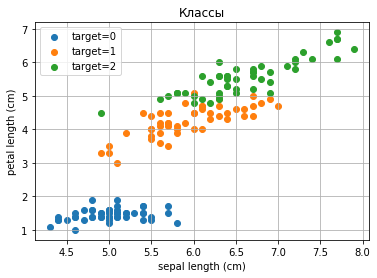

In [ ]:
axes = plt.axes()
legend = []
plt.title('Классы')
x_lable='sepal length (cm)'
y_lable='petal length (cm)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris.frame.groupby('target'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("target=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
X = iris.data[['sepal length (cm)', 'petal length (cm)']]
y = iris.target
print(X)
print("__________")
print(y)
target_names = iris.target_names
X_knn = knn_model.fit(X, y)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]
__________
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = X_knn.predict(X) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

print(predictions)
print(accuracy_score(y, predictions))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 2 2]
0.9533333333333334


In [ ]:
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]])

# Определение границ классов

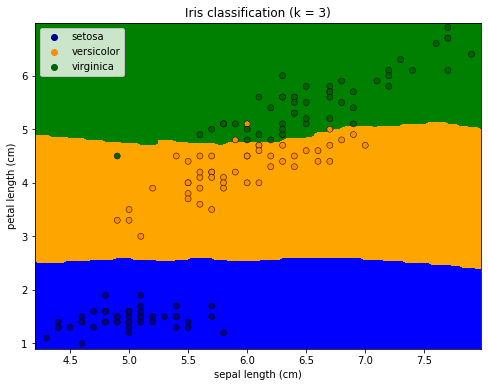

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

iris = datasets.load_iris()

x = iris.data[:, :] #все данные об ирисах

X=np.delete(x,1, 1)
X=np.delete(X,2,1)
#print(X) #оставляем только нужные данные

y = iris.target

h = .03  # step size in the mesh (размер шага в сетке)

# Create color maps
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ['darkblue', 'darkorange', 'darkgreen']

# создаем экземпляр классификатора соседей и подгоняем данные.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)


# Нанесите на график границу принятия решения. Для этого мы назначим цвет каждому
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris classification (k = %i)" % (n_neighbors))
plt.xlabel(iris.feature_names[0]) #sepal length
plt.ylabel(iris.feature_names[2]) #petal length

plt.show()


# Определение оптимального числа соседей

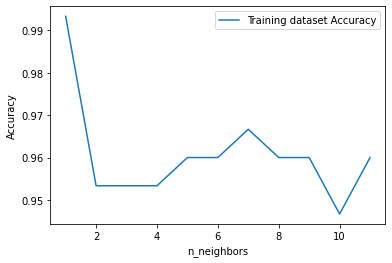

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
  
neighbors = np.arange(1, 12) #равномерно распределенные значения в пределах заданного интервала
train_accuracy = np.empty(len(neighbors)) #создание двух массивов размером 11 (не инициализированный)
test_accuracy = np.empty(len(neighbors))


# Цикл по K значениям
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X, y)
      
# Generate plot
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
# метод к-средних
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

#print(X)
# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(X)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 0.8]])

# Предсказание на всем наборе данных
all_predictions = model.predict(X)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
target=iris['target']
len(target)
len(all_predictions)
for i in range(len(target)):
   print(' i:',i,'  ', target[i] ,'  ',all_predictions[i])

 i: 0    0    0
 i: 1    0    0
 i: 2    0    0
 i: 3    0    0
 i: 4    0    0
 i: 5    0    0
 i: 6    0    0
 i: 7    0    0
 i: 8    0    0
 i: 9    0    0
 i: 10    0    0
 i: 11    0    0
 i: 12    0    0
 i: 13    0    0
 i: 14    0    0
 i: 15    0    0
 i: 16    0    0
 i: 17    0    0
 i: 18    0    0
 i: 19    0    0
 i: 20    0    0
 i: 21    0    0
 i: 22    0    0
 i: 23    0    0
 i: 24    0    0
 i: 25    0    0
 i: 26    0    0
 i: 27    0    0
 i: 28    0    0
 i: 29    0    0
 i: 30    0    0
 i: 31    0    0
 i: 32    0    0
 i: 33    0    0
 i: 34    0    0
 i: 35    0    0
 i: 36    0    0
 i: 37    0    0
 i: 38    0    0
 i: 39    0    0
 i: 40    0    0
 i: 41    0    0
 i: 42    0    0
 i: 43    0    0
 i: 44    0    0
 i: 45    0    0
 i: 46    0    0
 i: 47    0    0
 i: 48    0    0
 i: 49    0    0
 i: 50    1    2
 i: 51    1    1
 i: 52    1    2
 i: 53    1    1
 i: 54    1    1
 i: 55    1    1
 i: 56    1    1
 i: 57    1    1
 i: 58    1    1
 i: 59 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = model.predict(X) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

print(predictions)
print(accuracy_score(y, predictions))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.88


In [ ]:
confusion_matrix(y, predictions)

array([[50,  0,  0],
       [ 1, 45,  4],
       [ 0, 13, 37]])